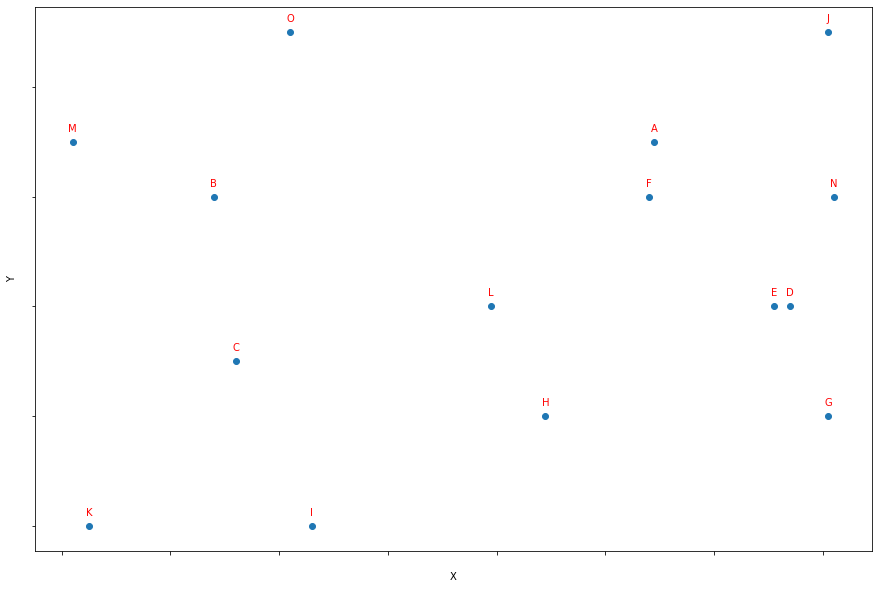

In [101]:
import numpy as np
import pandas as pd
import random as rn
from matplotlib import pyplot as plt


wellname = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O"]
x= [np.random.randint(0,150) for k in range(len(wellname))]
y = [np.random.randint(0,10) for k in range(len(wellname))]
well = list(zip(x,y))
well = pd.DataFrame(well, index = wellname )
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(color = "white")
plt.yticks(color = "white")
for i, name in enumerate(wellname):
    plt.annotate(name, # this is the text
                 well.iloc[i], # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 c="red")

In [102]:

# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = np.random.randint(len(pop))
	for ix in np.random.randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

In [103]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if np.random.rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = np.random.randint(2, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] 
		for k in range(0,len(p2)):
			if ((p2[k] not in c1) & (len(c1)!=len(p1))):
				c1.append(p2[k])
		c2 = p2[:pt]
		for k in range(0,len(p1)):
			if ((p1[k] not in c2) & (len(c2)!=len(p2))):
				c2.append(p1[k])
	return [c1, c2]

In [104]:
# mutation operator
def mutation(individual, r_mut):
	for i in range(1,len(individual)):
		# check for a mutation
		if np.random.rand() < r_mut:
			# flip the bit
			to_change = np.random.randint(1,len(individual))
			temp = individual[to_change]
			individual[to_change] = individual[i]
			individual[i] = temp
			break
			

In [105]:
def individu(wellname, startpoint):
    indiv = rn.sample(wellname,len(wellname)) 
    indiv.remove(startpoint)
    indiv = [startpoint] + indiv
    return indiv

def calculate_loss(x,y):
    loss = ((well.loc[x,1] - well.loc[y,1])**2 + (well.loc[x,0] - well.loc[y,0])**2)**0.5
    return loss

def solution_loss(x):
    #x is a solution - a list of well
    leng = len(x)
    losslist =[]
    for i in range(leng-1):
        singlelost = calculate_loss(x[i], x[i+1])
        losslist.append(singlelost)
    totallost = np.sum(losslist)
    return totallost





In [167]:
#function to rank individual in populations based on scores
def pop_rank(scores):
	scorebook = dict()
	for i,score in enumerate(scores):
		scorebook[i] = score
		rank = list(dict(sorted(scorebook.items(), key=lambda x:x[1])).keys())
	return rank

In [184]:
# genetic algorithm
def genetic_algorithm(objective, n_iter, n_pop, r_cross, r_mut, elitenum, startpoint):
	# initial population of random bitstring
	#pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
	pop = [individu(wellname,startpoint) for k in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(pop[0])
	losstracker = list()
	# enumerate generations
	for gen in range(n_iter):
		# evaluate all candidates in the population
		scores = [objective(c) for c in pop]
		rank = pop_rank(scores)
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
		losstracker.append(best_eval)
		# select parents, number of parents will be the number of individu in populations minus number of elit.
		#modulus of elitenum --%elitenum is used to ensure even number of parents
		num_parents = n_pop - elitenum+elitenum%2
		elite = [pop[i] for i in rank[:elitenum]]
		selected = [selection(pop, scores) for _ in range(num_parents)]
		# create the next generation
		children = list()
		for i in range(0, num_parents, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = elite + children
		#ensuring the consistency of population number
		pop = pop[:n_pop]
	return [best, best_eval, losstracker]

>0, new best f(['L', 'E', 'N', 'D', 'A', 'O', 'H', 'J', 'F', 'M', 'K', 'B', 'G', 'C', 'I']) = 670.543
>0, new best f(['L', 'G', 'K', 'F', 'A', 'N', 'D', 'H', 'J', 'E', 'O', 'M', 'C', 'B', 'I']) = 636.020
>0, new best f(['L', 'B', 'C', 'O', 'A', 'E', 'J', 'H', 'D', 'G', 'N', 'K', 'I', 'F', 'M']) = 623.457
>1, new best f(['L', 'F', 'G', 'J', 'A', 'C', 'E', 'B', 'K', 'M', 'O', 'I', 'D', 'N', 'H']) = 611.273
>1, new best f(['L', 'A', 'H', 'N', 'I', 'E', 'G', 'J', 'F', 'D', 'K', 'O', 'M', 'C', 'B']) = 604.065
>1, new best f(['L', 'B', 'C', 'I', 'A', 'E', 'H', 'O', 'K', 'M', 'G', 'F', 'D', 'J', 'N']) = 501.382
>2, new best f(['L', 'E', 'H', 'I', 'B', 'M', 'K', 'C', 'F', 'A', 'O', 'G', 'D', 'J', 'N']) = 479.664
>2, new best f(['L', 'I', 'O', 'C', 'M', 'B', 'K', 'N', 'H', 'E', 'J', 'G', 'A', 'F', 'D']) = 445.196
>3, new best f(['L', 'H', 'O', 'M', 'B', 'I', 'C', 'K', 'N', 'E', 'J', 'G', 'A', 'F', 'D']) = 410.615
>3, new best f(['L', 'J', 'D', 'N', 'G', 'F', 'A', 'E', 'C', 'B', 'K', 'M', 'O', '

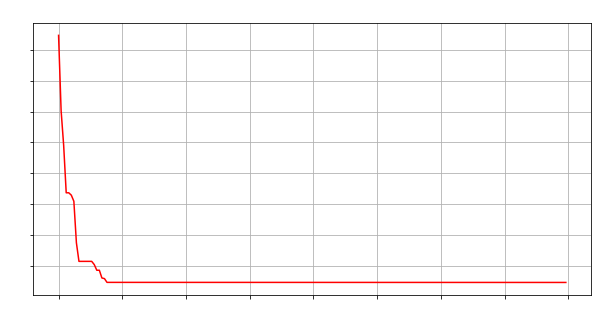

In [185]:
n_iter = 200 # number of generations
n_pop = 100 #population size
r_cross = 0.9 #cross over rate
r_mut = 0.1 #mutation rate
startpoint = "L" #startpoint
elitenum = 5 #number of elite

best, score , losstracker= genetic_algorithm(solution_loss, n_iter, n_pop, r_cross, r_mut, elitenum, startpoint)
print(best,score)

#plot loss function
plt.figure(figsize=(10,5))
plt.plot(range(len(losstracker)), losstracker, c="red")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.title("Generation vs Loss", c="white")
plt.grid()
plt.show()

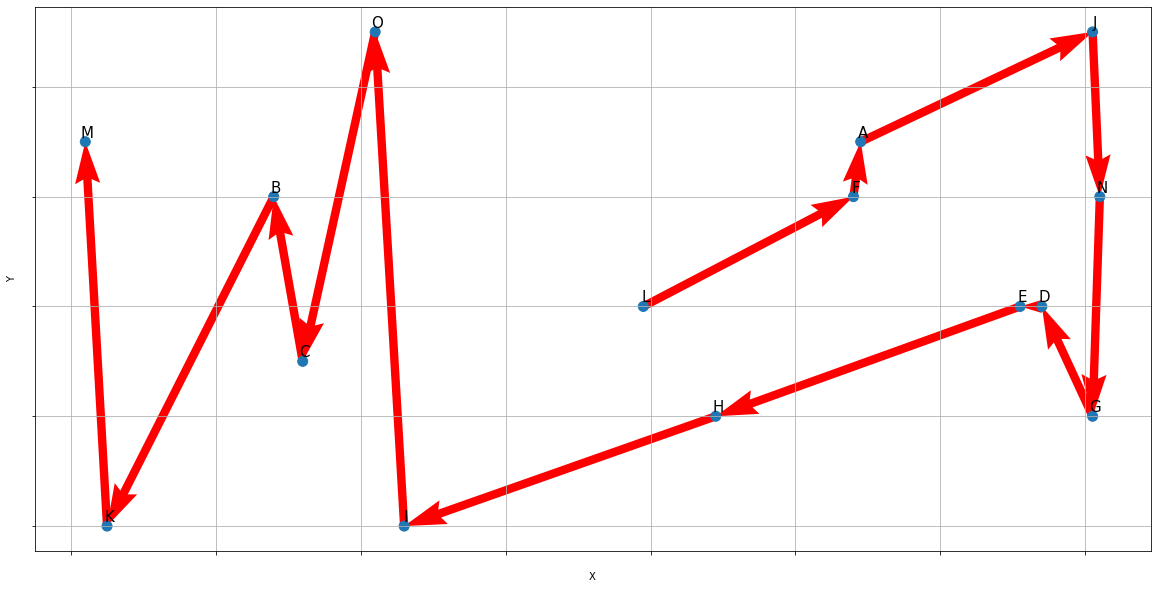

In [186]:
##Plot the Sequence in the map
import operator

a = [well.loc[best[t],0] for t in range(len(wellname))]
b = [well.loc[best[t],1] for t in range(len(wellname))]
plt.figure(figsize=(20,10))
plt.quiver(a[:-1], b[:-1], list(map(operator.sub,a[1:],a[:-1])), list(map(operator.sub, b[1:],b[:-1])), scale_units='xy', angles='xy', scale=1, color='red')
#plt.plot(a,b)
plt.scatter(x,y, s=[100 for x in range(len(wellname))])
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.grid()
for i, name in enumerate(wellname):
    plt.annotate(name, 
                 well.iloc[i], 
                 textcoords="offset points", 
                 xytext=(2,4), 
                 fontsize = 15,
                 ha='center',
                 c="black")